In [23]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import scipy
from sklearn.cluster import KMeans

In [24]:

def read_homography(file_path):
    # Initialize an empty list to store the matrix data
    homography_matrix = []

    # Open the file and read its contents line by line
    with open(file_path, 'r') as file:
        for line in file:
            # Split each line into individual elements (assuming space-separated values)
            elements = line.strip().split()
            
            # Convert the elements to float and append them to the matrix
            row = [float(element) for element in elements]
            homography_matrix.append(row)

    # Convert the list of lists to a NumPy array
    return np.array(homography_matrix)


In [25]:
DATA_DIR = "/home/fer/Escritorio/futstatistics/datasets/dataset7_homography"


images_1 = glob.glob(os.path.join(DATA_DIR, "test") + "/*.jpg")
images_2 = glob.glob(os.path.join(DATA_DIR, "train_val") + "/*.jpg")

labels_1 = glob.glob(os.path.join(DATA_DIR, "test") + "/*.homographyMatrix")
labels_2 = glob.glob(os.path.join(DATA_DIR, "train_val") + "/*.homographyMatrix")

gt_1 = glob.glob(os.path.join(DATA_DIR, "test") + "/*.mat")
gt_2 = glob.glob(os.path.join(DATA_DIR, "train_val") + "/*.mat")

images = sorted(images_1)
labels = sorted(labels_1)
gt = sorted(gt_1)

print(len(images))
print(len(labels))
print(len(gt))

186
186
186


In [58]:
DATA_DIR = "/home/fer/Escritorio/futstatistics/datasets/dataset7_homography"


images_1 = glob.glob(os.path.join(DATA_DIR, "test") + "/*.jpg")
images_2 = glob.glob(os.path.join(DATA_DIR, "train_val") + "/*.jpg")

labels_1 = glob.glob(os.path.join(DATA_DIR, "test") + "/*.homographyMatrix")
labels_2 = glob.glob(os.path.join(DATA_DIR, "train_val") + "/*.homographyMatrix")

gt_1 = glob.glob(os.path.join(DATA_DIR, "test") + "/*.mat")
gt_2 = glob.glob(os.path.join(DATA_DIR, "train_val") + "/*.mat")

images = sorted(images_1)
labels = sorted(labels_1)
gt = sorted(gt_1)

print(len(images))
print(len(labels))
print(len(gt))

186
186
186


In [59]:
im = "/home/fer/Escritorio/futstatistics/datasets/dataset7_homography/test/8.jpg"
lab = "/home/fer/Escritorio/futstatistics/datasets/dataset7_homography/test/8.homographyMatrix"
mask = "/home/fer/Escritorio/futstatistics/datasets/dataset7_homography/test/8_grass_gt.mat"

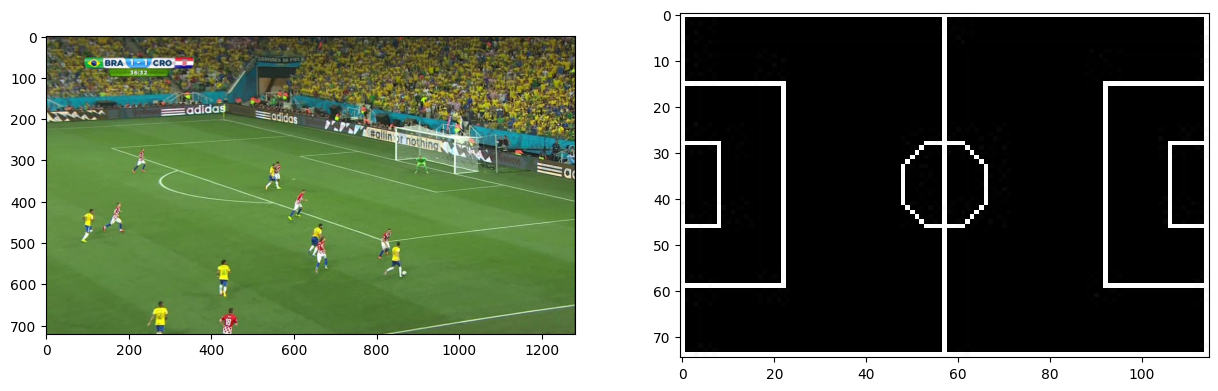

In [60]:
im = cv2.cvtColor(cv2.imread(im), cv2.COLOR_BGR2RGB)
field = cv2.cvtColor(cv2.imread('football_field.jpg'), cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(im)
ax[1].imshow(field)

(720, 1280)


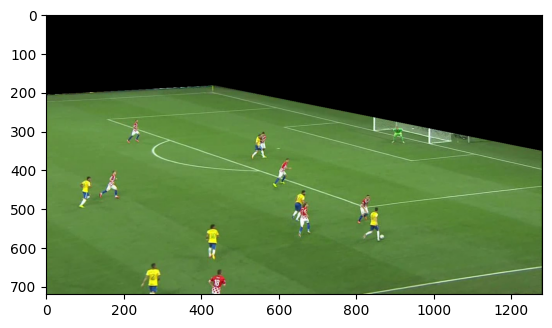

In [61]:
mat = scipy.io.loadmat(mask)
print(mat['grass'].shape)
masked = cv2.bitwise_and(im, im,mask=mat['grass'])
plt.imshow(masked)

[[ 9.9334547e-02  4.9523232e-01  1.6050185e+02]
 [ 5.3051280e-02  9.3862227e-01 -2.1331082e+02]
 [-2.8968468e-05  8.1729231e-03  1.0000000e+00]]


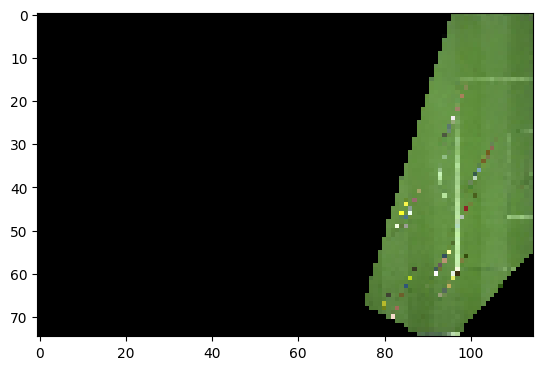

In [62]:
homo = read_homography(lab)
print(homo)
warped = cv2.warpPerspective(src=im, M=homo, dsize=(field.shape[1], field.shape[0]))
plt.imshow(warped)

In [63]:
POINT = (200,300)
POINT_ = np.array([POINT],np.float32).reshape(-1,1,2)
POINT_2D = cv2.perspectiveTransform(POINT_, homo).astype(int)

In [64]:
tuple(POINT_2D[0][0])

(95, 22)

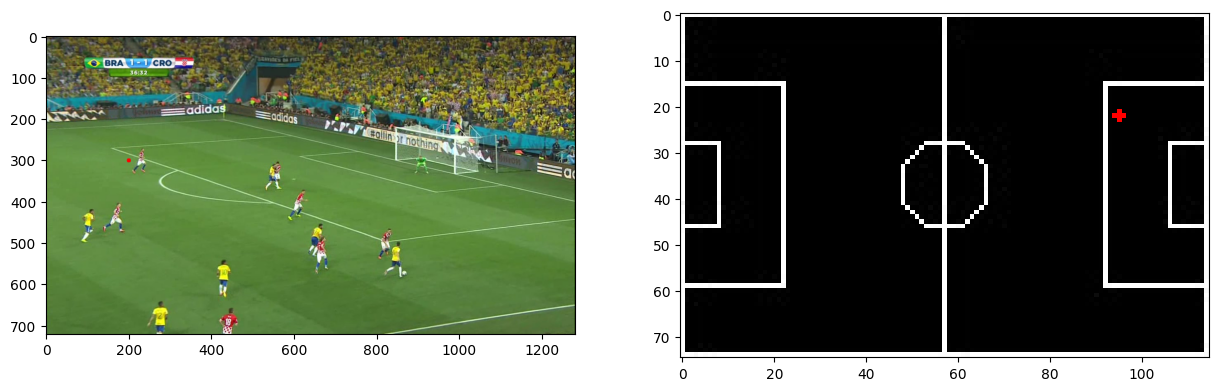

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

im  = cv2.circle(im,POINT,  5, (255, 0, 0), -1)
field  = cv2.circle(field,tuple(POINT_2D[0][0]),  1, (255, 0, 0), -1)


ax[0].imshow(im)
ax[1].imshow(field)

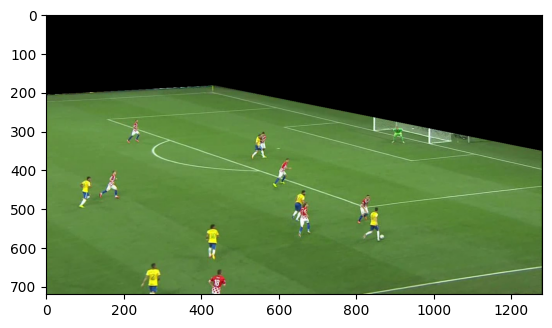

In [66]:
plt.imshow(masked)

In [96]:
# Convert the img to grayscale
gray = cv2.cvtColor(masked, cv2.COLOR_RGB2GRAY)
 
# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
 
# This returns an array of r and theta values
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=5, # Min allowed length of line
            maxLineGap=10 # Max allowed gap between line for joining them
            )

#lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
lines = lines.reshape(-1,4)



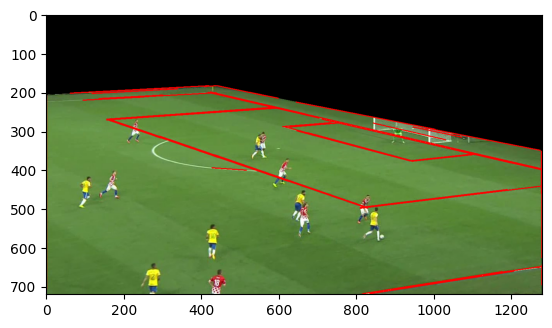

In [97]:
hougmasked = masked.copy()

# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points
    # Draw the lines joing the points
    # On the original image
    cv2.line(hougmasked,(x1,y1),(x2,y2),(255,0,0),2)
    # Maintain a simples lookup list for points

plt.imshow(hougmasked)

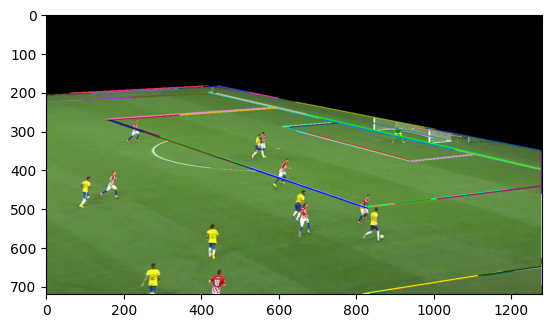

In [101]:
import distinctipy

hougmasked_colors = masked.copy()

# generate N visually distinct colours
colors = distinctipy.get_colors(len(lines))
rgb_colors = [(int(r * 255), int(g * 255), int(b * 255)) for r, g, b in colors]


# Iterate over points
for points, color in zip(lines,rgb_colors):
      # Extracted points nested in the list
    x1,y1,x2,y2=points
    # Draw the lines joing the points
    # On the original image
    cv2.line(hougmasked,(x1,y1),(x2,y2),color,2)
    # Maintain a simples lookup list for points

plt.imshow(hougmasked)

In [69]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(lines)

/home/fer/miniconda3/envs/futstats/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

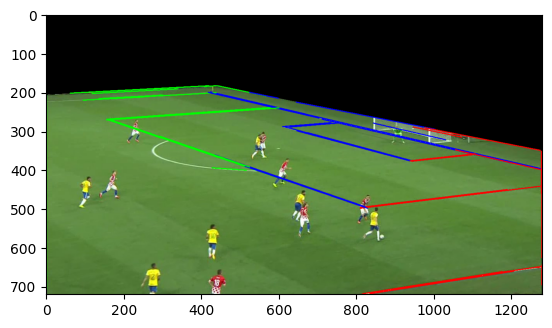

In [102]:
hougmasked_cluster = masked.copy()


for line in lines:
    x1,y1,x2,y2=line
    cluster = kmeans.predict(line.reshape(1,4))
    if cluster == 0:
        color = (255,0,0)
    elif cluster == 1:
        color = (0,255,0)
    else:
        color = (0,0,255)
    cv2.line(hougmasked_cluster,(x1,y1),(x2,y2),color,2)
    # Maintain a simples lookup list for points
plt.imshow(hougmasked_cluster)

In [103]:
from shapely.geometry import LineString, Point,MultiPoint


def find_intersections(lines):
    line_geometries = [LineString([(x1, y1), (x2, y2)]) for x1, y1, x2, y2 in lines]
    intersection_points = [line1.intersection(line2) for line1 in line_geometries for line2 in line_geometries if line1.intersects(line2) and line1 != line2]
    
    # Filter out duplicate intersection points
    unique_intersection_points = []
    for point in intersection_points:
        if isinstance(point, Point) and point not in unique_intersection_points:
            unique_intersection_points.append(point)
    
    return [(point.x, point.y) for point in unique_intersection_points]

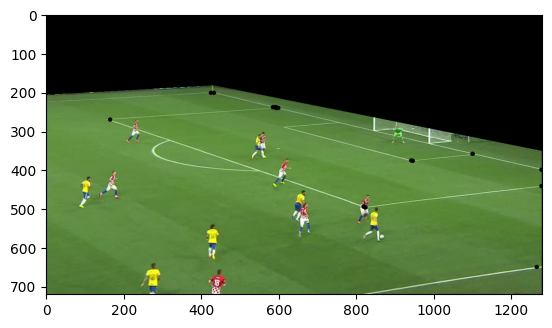

In [104]:
hougmasked_intersect = masked.copy()
for intersection in find_intersections(lines):
    x,y = int(intersection[0]),int(intersection[1])
    cv2.circle(hougmasked_intersect, (x,y), 3, (0,0,0), 3)

plt.imshow(hougmasked_intersect)

#

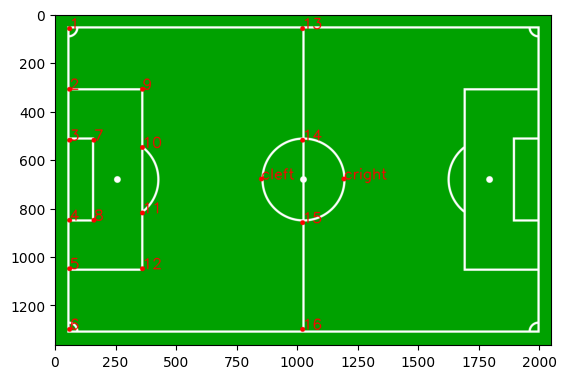

In [106]:
field = cv2.cvtColor(cv2.imread('field_2d.jpg'), cv2.COLOR_BGR2RGB)


POINT2POINT2D = {
    "1" : (60, 60),
    "2" : (60,310),
    "3" : (60,520),
    "4" : (60,850),
    "5" : (60,1050),
    "6" : (60,1300),
    "7" : (160,520),
    "8" : (160,850),
    "9" : (360,310),
    "10" : (360,550),
    "11" : (360,820),
    "12" : (360,1050),
    "13": (1020,60),
    "14" : (1020,520),
    "15" : (1020,860),
    "16" : (1020,1300),
    "cright" : (1190,680),
    "cleft" : (850,680),
}

check = field.copy()

for id_, coord in POINT2POINT2D.items():
    check = cv2.circle(check, coord, 10, (255, 0, 0), -1)
    check = cv2.putText(check, id_, coord, cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0),3)

plt.imshow(check)

In [ ]:
import cv2
import numpy as np

# Assuming you have detected and stored keypoints for both HoughLines intersections and landmarks.

# Feature Matching
matcher = cv2.FlannBasedMatcher(dict(algorithm=0, trees=5), {})

matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract corresponding points
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Estimate Homography
homography, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Apply Homography to HoughLines intersections
transformed_points = cv2.perspectiveTransform(hough_lines_intersections, homography)

# transformed_points now contains the mapped coordinates of the HoughLines intersections to the real soccer landmarks.
